<a href="https://colab.research.google.com/github/macauli10/DeteccaoAnomalia/blob/main/DetectedAnomalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
data = np.array([30,29,30,31,100,29,28,30,300,31,32,33])

In [ ]:
zscores = stats.zscore(data)
print(zscores)

[-0.37966016 -0.39294273 -0.37966016 -0.36637759  0.55011982 -0.39294273
 -0.4062253  -0.37966016  3.20663406 -0.36637759 -0.35309502 -0.33981245]


In [ ]:
anomalia = data[np.abs(zscores)>3]
print(f'Anomalias Identificadas: {anomalia}')

Anomalias Identificadas: [300]


In [ ]:
dataset = [1,2,3,4,5,6,7,8,9,100]

In [ ]:
quartil1 = np.percentile(dataset, 25)
quartil3 = np.percentile(dataset, 75)
iqr = quartil3 - quartil1
limiteinferior = quartil1 - 1.5 * iqr
limitesuperior = quartil3 + 1.5 * iqr
outliers = [x for x in dataset if x < limiteinferior or x > limitesuperior]
print(f'Outliers: {outliers}')


Outliers: [100]


In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
np.random.seed(42)
data_matrix =  np.random.rand(100,2)

In [ ]:
data_matrix[0,0] = 1000

In [ ]:
data_matrix = data_matrix.reshape(-1,1)

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
lista = lof.fit_predict(data_matrix)

In [ ]:
lista

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
position = np.where(lista == -1)
print(data_matrix[position])

[[1000.]]


In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_iris

In [ ]:
data = load_iris().data

In [ ]:
model = IsolationForest(contamination=0.01)
model.fit(data)

IsolationForest(contamination=0.01)

In [ ]:
predictions = model.predict(data)

In [ ]:
predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
data[predictions == -1]

array([[7.7, 2.6, 6.9, 2.3],
       [7.9, 3.8, 6.4, 2. ]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.astype('float32')/ 255.0
X_test = X_test.astype('float32')/ 255.0

In [ ]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [ ]:
X_test_noisy = X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

In [ ]:
from enum import auto
inputs = Input(shape=(784,))
encoder = Dense(32, activation='relu')(inputs)
decoder = Dense(784, activation='sigmoid')(encoder)
autoencoder = Model(inputs=inputs, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3820
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1827
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1497
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1317
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1199
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1124
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1069
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1029
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1003
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0980
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0965
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0957
Epoch 13/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0950
Epoch 14/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0945
Epoch 15/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
test_normal_decoded = autoencoder.predict(X_test)
test_anomalies_decoded = autoencoder.predict(X_test_noisy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
mse_normal = mean_squared_error(X_test, test_normal_decoded)
mse_anomalies = mean_squared_error(X_test_noisy, test_anomalies_decoded)
print('MSE Normal: ', mse_normal)
print('MSE Anomalias: ', mse_anomalies)

MSE Normal:  0.009538507089018822
MSE Anomalias:  0.170730039925436


In [ ]:
print('Diferença do MSE: ', mse_anomalies - mse_normal )

Diferença do MSE:  0.16119153283641718


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
dataset_train = pd.read_csv('Salestrain.csv')
dataset_test = pd.read_csv('Salestest.csv')

In [ ]:
dataset_train.shape

(96, 1)

In [ ]:
dataset_train.head()

,data
0,112
1,118
2,132
3,129
4,121


In [ ]:
dataset_train.describe()

,data
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


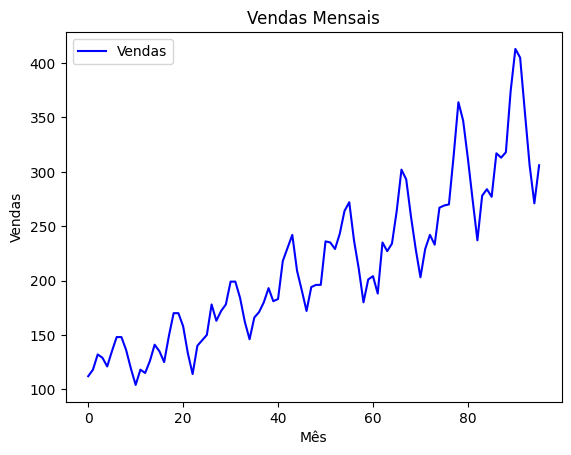

In [ ]:
plt.plot(dataset_train, color='blue', label='Vendas')
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(dataset_train)

In [ ]:
X_train = []
y_train = []
for i in range(90, len(training_set_scaled)):
  data = training_set_scaled[i-90:i, 0]
  X_train.append(data)
  y_train.append(training_set_scaled[i, 0])
X_train= np.array(X_train).reshape(-1,90,1)
y_train = np.array(y_train)

In [ ]:
modelo = Sequential()
modelo.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=100, return_sequences=True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=100, return_sequences=True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=100))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=1))
modelo.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modelo.fit(X_train, y_train, epochs=300, batch_size=1)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.3702
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1920
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0556
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0465
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0463
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0880
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0459
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0387
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0554
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0706
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0401
Epoch 13/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0644
Epoch 14/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0448
Epoch 15/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0318
Epoch 16/300
6/6 ━━

In [ ]:
dataset_test.shape

(48, 1)

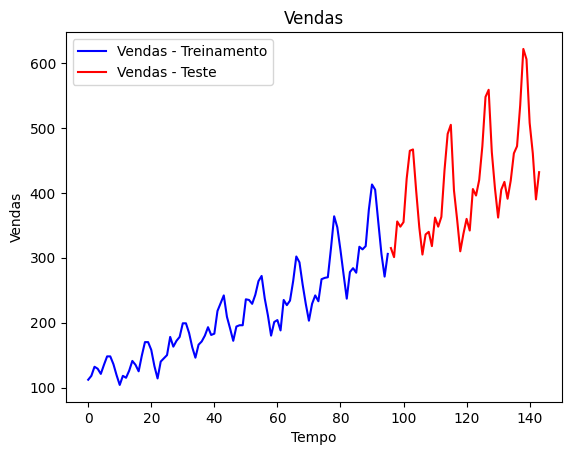

In [ ]:
train_values = dataset_train['data'].values
test_values = dataset_test['data'].values
total_values = np.concatenate((train_values, test_values), axis=0)
time_index = range(len(total_values))
plt.plot(time_index[:len(train_values)], train_values, color='blue', label='Vendas - Treinamento')
plt.plot(time_index[len(train_values):], test_values, color='red', label='Vendas - Teste')
plt.title('Vendas')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [ ]:
dataset_test_anomalies = dataset_test.copy()
dataset_test_anomalies.loc[:9,'data'] = 90
dataset_test_anomalies.loc[10:34,'data'] = np.random.uniform(100,200,size=(25,))
dataset_test_anomalies.loc[35:,'data'] = 90

<ipython-input-25-080a2242b4aa>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[156.90034036 170.39546757 121.69131926 121.01032615 174.66458132
 174.82450939 183.54073789 126.32703505 190.48999741 189.09357012
 155.83741521 189.5585343  120.07095441 110.76060372 116.87293295
 194.47806216 132.11377912 138.33001434 193.33001822 130.79605354
 121.6662008  178.94619046 128.64805318 173.23783457 184.47030298]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_test_anomalies.loc[10:34,'data'] = np.random.uniform(100,200,size=(25,))


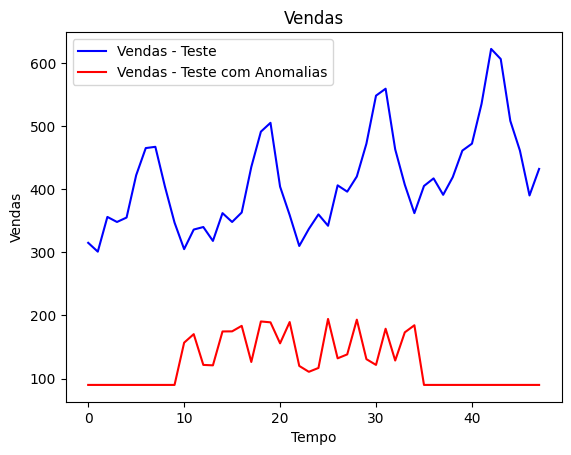

In [ ]:
plt.plot(dataset_test, color='blue', label='Vendas - Teste')
plt.plot(dataset_test_anomalies, color='red', label='Vendas - Teste com Anomalias')
plt.title('Vendas')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [ ]:
dataset_total = pd.concat((dataset_train['data'], dataset_test['data']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values
inputs = pd.DataFrame(inputs, columns=['data'])
inputs = sc.transform(inputs)

In [ ]:
dataset_total_anomalies = pd.concat((dataset_train['data'], dataset_test_anomalies['data']), axis=0)
inputs_anomalies = dataset_total_anomalies[len(dataset_total_anomalies) - len(dataset_test_anomalies) - 90:].values
inputs_anomalies = pd.DataFrame(inputs_anomalies, columns=['data'])
inputs_anomalies = sc.transform(inputs_anomalies)

In [ ]:
from re import X
X_test = []
X_test_anomalies = []
for i in range(90, len(inputs)):
  X_test.append(inputs[i-90:i, 0])
  X_test_anomalies.append(inputs_anomalies[i-90:i, 0])
X_test, X_test_anomalies = np.array(X_test), np.array(X_test_anomalies)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_anomalies = np.reshape(X_test_anomalies, (X_test_anomalies.shape[0], X_test_anomalies.shape[1], 1))

In [ ]:
predicted_sales = modelo.predict(X_test)
predicted_sales = sc.inverse_transform(predicted_sales)
predicted_sales_anomalies = modelo.predict(X_test_anomalies)
predicted_sales_anomalies = sc.inverse_transform(predicted_sales_anomalies)

mse_test = mean_squared_error(test_values, predicted_sales)
mse_test_anomalies = mean_squared_error(test_values, predicted_sales_anomalies)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
print(f'MSE para os dados normais: {mse_test}')
print(f'MSE para os dados com anomalias: {mse_test_anomalies}')

MSE para os dados normais: 8708.767578125
MSE para os dados com anomalias: 17488.037109375


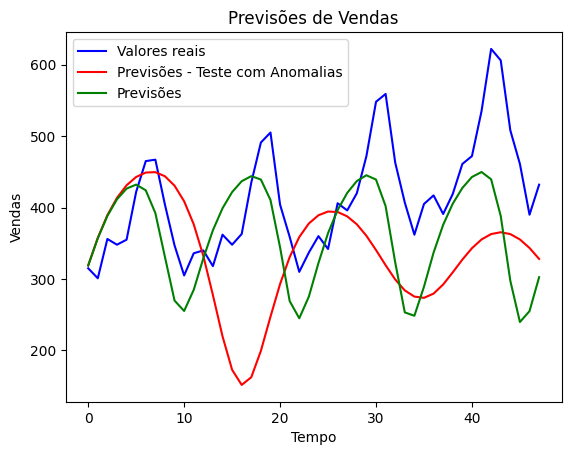

In [ ]:
plt.plot(test_values, color='blue', label='Valores reais')
plt.plot(predicted_sales_anomalies, color='red', label='Previsões - Teste com Anomalias')
plt.plot(predicted_sales, color='green', label='Previsões')
plt.title('Previsões de Vendas')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.random.normal(0,1,100) + np.linspace(0,1,100)
data[50] = 10

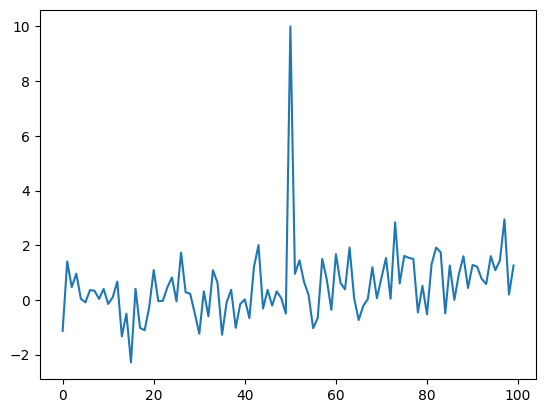

In [ ]:
plt.plot(data)
plt.show()

In [ ]:
s = pd.Series(data)
s_ma = s.rolling(10).mean()


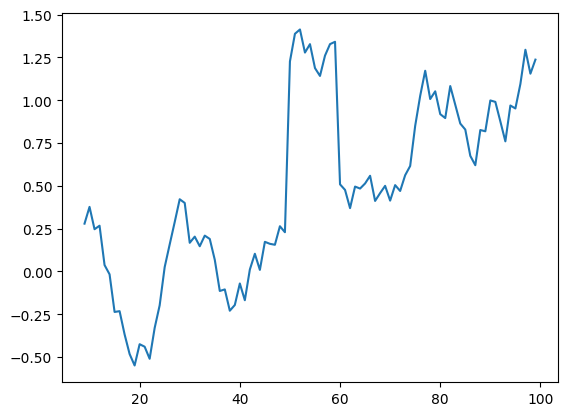

In [ ]:
plt.plot(s_ma)
plt.show()

In [ ]:
anomalies = s[np.abs(s - s_ma) > 3 * s.std() ]

In [ ]:
anomalies

,0
50,10.0


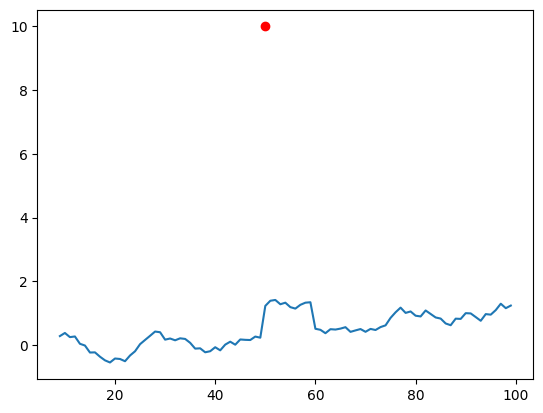

In [ ]:
plt.plot(s_ma)
plt.scatter(anomalies.index, anomalies.values, color='red')
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
np.random.seed(5)
data = np.random.normal(0,1,100) + np.linspace(0,1,100)
data[50] = 4

In [ ]:
modelo = SimpleExpSmoothing(data)
model_fit = modelo.fit(smoothing_level=0.2)

/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
data_pred = model_fit.predict(0, len(data)-1)

In [ ]:
data_pred

array([ 0.44122749,  0.44122749,  0.28882816,  0.72125717,  0.53264792,
        0.45612111,  0.69149412,  0.38347003,  0.20259011,  0.21575435,
        0.1248113 , -0.11850186, -0.11355457, -0.13836702,  0.03626333,
       -0.27566421, -0.33026415, -0.00160988,  0.40452173,  0.05774511,
        0.21354943,  0.015122  , -0.11684878, -0.22341042, -0.21676528,
        0.07436059,  0.25247778,  0.26633632,  0.19495234,  0.2131853 ,
        0.20794801,  0.38557513,  0.24477204,  0.25922512,  0.25383324,
        0.26129183,  0.32958406,  0.37592654,  0.64245842,  0.57335929,
        0.84978177,  0.6994629 ,  0.54685232,  0.54247797,  0.59193876,
        0.61636238,  0.84239167,  0.99471123,  0.98960655,  0.82138769,
        0.73597718,  1.38878174,  1.25830652,  0.8495411 ,  0.64879054,
        0.51262069,  0.75164862,  0.69301741,  1.1215868 ,  1.14576505,
        1.06076532,  0.8826836 ,  1.02381506,  0.89616235,  0.67937791,
        0.7864218 ,  0.76300224,  0.98154727,  0.90587269,  0.29

In [ ]:
anomalies = np.where(np.abs(data - data_pred) > 3 * data.std())[0]

In [ ]:
anomalies

array([50])

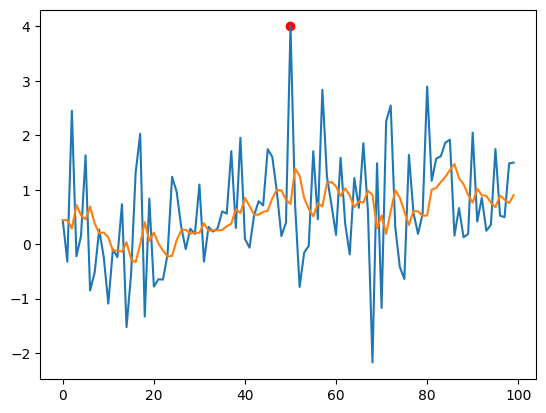

In [ ]:
plt.plot(data, label='Dados Originais')
plt.plot(data_pred, label='Suavização Exponencial Simples')
plt.scatter(anomalies, data[anomalies], color='red', label='Anomalias')


In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
data_frame = pd.read_csv('Salestrain.csv')
data_frame = data_frame['data'].values
data_frame.shape

(96,)

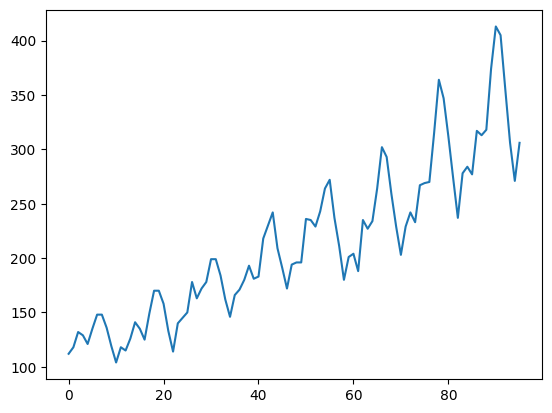

In [ ]:
plt.plot(data_frame, label='dados')
plt.show()

In [ ]:
stl = STL(data_frame, period=12)
result = stl.fit()

In [ ]:
result.resid

array([  0.38835752,  -2.50750691,  -0.93625151,   2.14162814,
         1.95456987,   1.21890815,  -0.80002572,   0.80836527,
        -1.89984247,   1.34346989,   1.65187552,  -1.82788746,
        -4.50456314,  -1.06687059,  -3.05765906,  -1.90213468,
        -7.77034967,  -1.31406681,   2.38807894,   0.4812818 ,
         2.38690557,  -2.88002304,  -5.80996708,  -0.20666854,
         2.38439658,   0.81047685,   6.42077269,  -0.98227956,
         9.20876026,  -4.66903365,  -2.50406235,  -5.89644175,
        -0.16347293,  -0.26313277,   3.24944939,   2.09441975,
         3.28026057,   8.71633635,  -5.98884203,  -9.45304011,
        -8.92739973,   5.01082799,  -3.71550738,   2.92040346,
        -4.05009791,   0.06229684,   2.29264496,   1.64605422,
        -1.14771963,   1.01210254,   8.24062672,  14.55119312,
         7.83958054,  -2.78424127,  -6.19235752,   2.11499237,
         1.15053649,   2.76388894,  -0.70161573,  -2.47191521,
        -4.20817055, -13.42517527,  -1.67668854,  -4.62

In [ ]:
anomalies = np.where(np.abs(result.resid) > 2.5 * result.resid.std())[0]

In [ ]:
anomalies

array([51, 61])

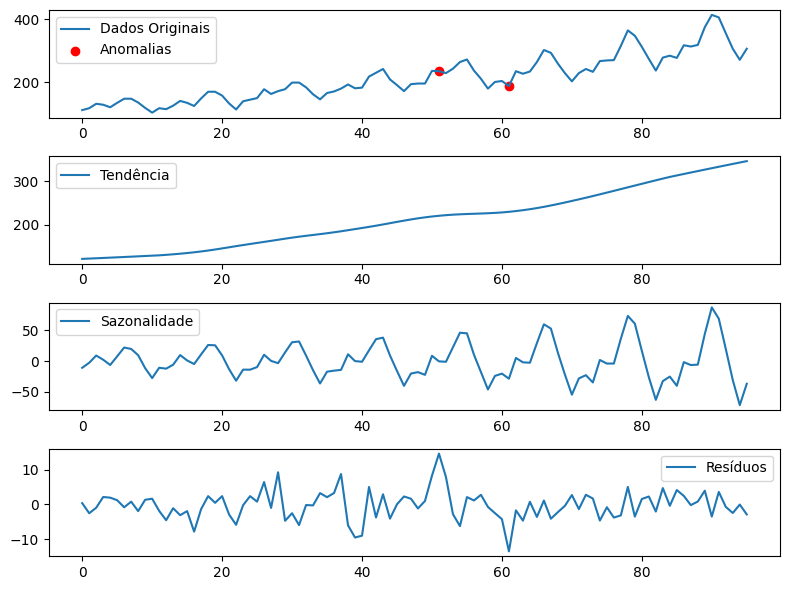

In [ ]:
plt.figure(figsize=(8,6))

plt.subplot(411)
plt.plot(data_frame, label='Dados Originais')
plt.scatter(anomalies, data_frame[anomalies], color='red', label='Anomalias')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Tendência')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Sazonalidade')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Resíduos')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.6 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [ ]:
data_frame = pd.read_csv('Salestrain.csv')
data_frame = data_frame['data'].values

In [ ]:
model = auto_arima(data_frame, seasonal=True, m=12, trace=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [ ]:
print(model.order)

(1, 1, 0)
